In [65]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
from skimage.filters import gaussian,laplace,threshold_otsu
import scipy.ndimage
import skimage
import math

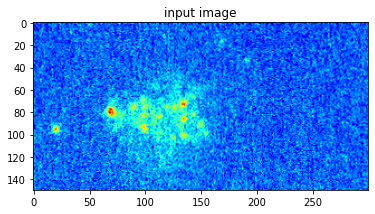

In [66]:
imfile = '/content/img_A4_P1.bmp'
I = io.imread(imfile,as_gray=True)
plt.imshow(I,cmap='jet'),plt.title('input image')
plt.show()

# Create a Laplacian-of-Gaussian Volume

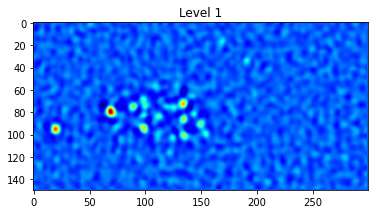

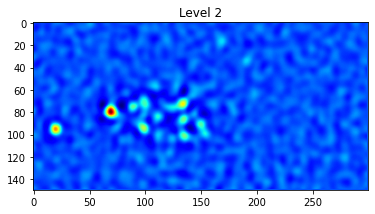

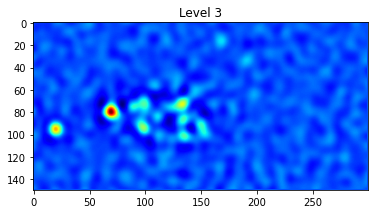

In [67]:
"""add your code here"""
# Create a 3 level Laplacian-of-Gaussian volume
# Apply LoG at 3 different sigma values to this image
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian
# https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.laplace
# Level 1
sigma1 = 3
level1 = skimage.filters.gaussian(I, sigma=sigma1)
# The kernel size k can be computed as k = 2 * round(3 * sigma) + 1
k1 = 2 * round(3 * sigma1) + 1
level1_output = skimage.filters.laplace(level1, ksize=k1)
plt.imshow(level1_output,cmap='jet'),plt.title('Level 1')
plt.show()

# Level 2
sigma2 = 4
level2 = skimage.filters.gaussian(I, sigma=sigma2)
k2 = 2 * round(3 * sigma2) + 1
level2_output = skimage.filters.laplace(level2, ksize=k2)
plt.imshow(level2_output,cmap='jet'),plt.title('Level 2')
plt.show()

# Level 3
sigma3 = 5
level3 = skimage.filters.gaussian(I, sigma=sigma3)
k3 = 2 * round(3 * sigma3) + 1
level3_output = skimage.filters.laplace(level3, ksize=k3)
plt.imshow(level3_output,cmap='jet'),plt.title('Level 3')
plt.show()

# All 3 levels of the volume are stored in a single h * w * 3 numpy array
h, w = I.shape[:2]
LoG = np.zeros((h, w, 3))
LoG[:, :, 0] = level1_output
LoG[:, :, 1] = level2_output
LoG[:, :, 2] = level3_output

#Obtain a rough estimate of blob locations

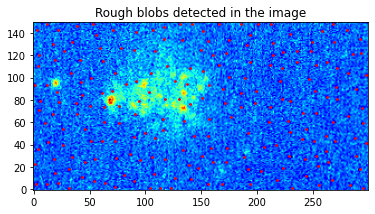

In [68]:
"""add your code here"""
# Obtain a rough estimate of blob locations
lm = scipy.ndimage.filters.minimum_filter(LoG, size=14)
# https://stackoverflow.com/questions/27598103/what-is-the-difference-between-imregionalmax-of-matlab-and-scipy-ndimage-filte
msk = (LoG == lm) #// convert local min values to binary mask

# Collapse 3D binary image into a single channel image 
# by calculating the sum of the corresponding pixels in 3 channels.
# Sum in the third axis expansion direction.
sum = np.sum(msk, axis=2)

# Show the locations of all non-zero entries in the collapsed array 
# overlaid on the input image as red points.
red_point = np.nonzero(sum)

# Plot red points
plt.scatter(red_point[1], red_point[0], s=12, c='red', marker = '.')

# Plot image I
plt.imshow(I, cmap='jet'), plt.title('Rough blobs detected in the image')
# Invert y axis
# https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
plt.gca().invert_yaxis()
plt.show()

# Refine the blobs using Otsu thresholding

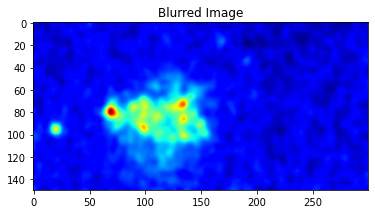

In [69]:
"""add your code here"""
# Refine the blobs using Otsu thresholding
# Apply Gaussian filtering by skimage.filters.gaussian with sigma = 2.5
blurred = skimage.filters.gaussian(I, sigma=2.5) 

# Plot image blurred
plt.imshow(blurred, cmap='jet'), plt.title('Blurred Image')
plt.show()

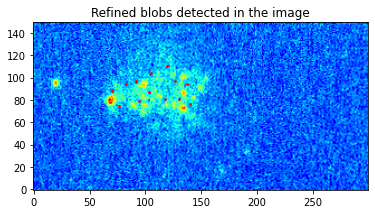

In [71]:
"""add your code here"""
# Convert the blurred image to 8-bit unsigned integer format
ubyte_blurred = skimage.img_as_ubyte(blurred)

# Apply Otsu thresholding on the blurred image
thresh = skimage.filters.threshold_otsu(ubyte_blurred)

# Remove all minima in the output image of "Obtain a rough estimate of blob locations" 
# where pixel values are less than the obtained threshold
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
# Get a boolean mask
# https://stackoverflow.com/questions/53814869/numpy-multidimensional-boolean-mask
pixel = ubyte_blurred > thresh
binary = np.multiply(sum, pixel)
new_red_point = np.nonzero(binary)

# Plot new red points
plt.scatter(new_red_point[1], new_red_point[0], s=12, c='red', marker = '.')

# Plot image I
plt.imshow(I, cmap='jet'), plt.title('Refined blobs detected in the image')
# Invert y axis
# https://stackoverflow.com/questions/2051744/reverse-y-axis-in-pyplot
plt.gca().invert_yaxis()
plt.show()